# Motion of point particles on 1-D parametric curve  
  
<br>Here, we will use Lagrangian Formulation. We have defined Lagrangian in Cartesian co-ordinates, and then (x,y) are defined as a form of single generalized co-ordinate.

In [17]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from IPython.display import HTML

<br>

First, we will deffine the symbols of all parameters using sympy. So, we can automate the calculations of Lagrangian and its solution later.

<br>



In [18]:
t, m, g = smp.symbols('t m g')
the = smp.symbols(r'\theta', cls=smp.Function)   # symbol for \theta
the = the(t)                                     # \theta introducing as a function of time
the_d = smp.diff(the, t)                         # forst time derivative of \theta
the_dd = smp.diff(the_d, t)                      # second time derivative of \thera

In [19]:
x, y = smp.symbols('x y', cls=smp.Function)    
x = x(the)                                      # x as a function of \theta
y = y(the)                                      # y as a function of \theta


Here, we define the curve. We have defined the **Tautachrone Curve** in terms of theta.  
<br>
Special thing about this curve is that particles sliding on this curve under the influence of the gravity (with out friction), reaches to the centre of the curve togather regardless of the initial position of the curve.  
<br>
You can learn more about this curve [here](https://en.wikipedia.org/wiki/Tautochrone_curve)

In [20]:

    x = smp.sin(2*the) + 2*the           # defining x
    y = 1 - smp.cos(2*the)               # defining y
    x_f = smp.lambdify(the, x)           # defining the fuction x
    y_f = smp.lambdify(the, y)           # defining the fuction y


In [21]:
# Defining the Lagrangian

T = 1/2 * m * (smp.diff(x,t)**2 + smp.diff(y,t)**2)    # Kinetic energy
V = m*g*y                                              # Potential energy
L = T-V

In [22]:
LE = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t) # Lagrangian equation of motion
LE = LE.simplify()

In [23]:
deriv_2 =smp.solve(LE, the_dd)[0]  # Solving Lagrangian equation to get expression of 2nd derivtive of \theta
deriv_1 = the_d

In [24]:
deriv2_f = smp.lambdify((g, the, the_d), deriv_2)  # defining the fuction of 2nd derivative
deriv1_f = smp.lambdify(the_d, the_d)              # defining the fuction of 1st derivative

 We define $S = (\theta, \omega)$, where $\omega = \frac{d\theta}{dt}$
 <br>
 Defining this helps us to solve two 1st order differential equation rather than 2nd order diff. equation.
 <br>
 We will solve this for $\frac{d\theta}{dt} and \frac{d\omega}{dt}$

In [10]:
def dSdt(S, t):
    return [
        deriv1_f(S[1]), #dtheta/dt
        deriv2_f(g, S[0], S[1]) #domega/dt
    ]

In [11]:
t = np.linspace(0, 20, 1000)
g = 9.81
ans1 = odeint(dSdt, y0=[np.pi/4, 0], t=t)
ans2 = odeint(dSdt, y0=[np.pi/3, 0], t=t)

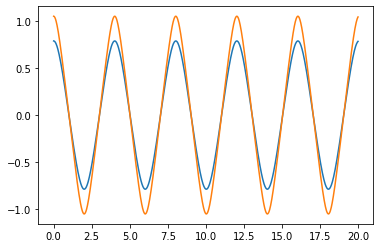

In [12]:
plt.plot(t,ans1.T[0])
plt.plot(t,ans2.T[0])


In above graph, we can see that both particles have same Periodic time. Which is one of the properties of Tautachrone curve.

In [13]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [14]:
x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

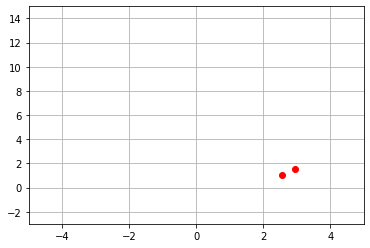

In [15]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-3, 15)
ax.set_xlim(-5,5)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=50)

In [16]:
HTML(ani.to_jshtml())